<a href="https://colab.research.google.com/github/beyounding/dyslexia_projects/blob/main/dyslexia_corpus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This algorithm, based on the input text, finds potentially difficult words for children with dyslexia to read in order to use them further in the process of intervention. There are groups of graphically similar letters for the Russian language, identified by B. G. Ananiev. The algorithm searches for these letters in words, and if there are more than two such letters from one group in one word, it adds them to the array.

*Preprocessing data*

In [ ]:
from string import punctuation
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import pymorphy2
from nltk.probability import FreqDist
import pandas as pd

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('corpus')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Error loading corpus: Package 'corpus' not found in index


False

In [ ]:
with open("texts.txt", "r") as file:
    text = file.read()

In [ ]:
text.lower()
token = word_tokenize(text)

In [ ]:
russian_stopwords = stopwords.words('russian') + [a for a in punctuation]
russian_stopwords.extend(['это', 'нею', 'которая', 'который', 'а', 'без', 'где'])
token_2 = [word for word in token if word not in russian_stopwords]

In [ ]:
morph = pymorphy2.MorphAnalyzer()
for ii in range(len(token_2)):
  token_2[ii] = morph.parse(token_2[ii])[0].normal_form

In [ ]:
text=' '.join(token_2)


*Finding two or more letters from the same group in one word*

In [ ]:
first_group={'П', 'Г', 'Т', 'Р'}
second_group={'Р', 'В', 'З'}
third_group={'В', 'Б', 'Г'}
fourth_group={'В', 'Ф', 'Ю', 'Х'}
fifth_group={'Н', 'К', 'Х'}
sixth_group={'Е', 'З', 'Д', 'К'}

text=text.upper()

list1=[]
list2=[]
list3=[]
list4=[]
list5=[]
list6=[]

In [ ]:
text=[str(i) for i in text.split()]
for i in text:
  current_word=set(i)
  if len(current_word.intersection(first_group))>1:
    list1.append(i)
  if len(current_word.intersection(second_group))>1:
    list2.append(i)
  if len(current_word.intersection(third_group))>1:
    list3.append(i)
  if len(current_word.intersection(fourth_group))>1:
    list4.append(i)
  if len(current_word.intersection(fifth_group))>1:
    list5.append(i)
  if len(current_word.intersection(sixth_group))>1:
    list6.append(i)


In [ ]:
def sort_by_length(el):
        return len(el)


list1.sort(key=sort_by_length)
list2.sort(key=sort_by_length)
list3.sort(key=sort_by_length)
list4.sort(key=sort_by_length)
list5.sort(key=sort_by_length)
list6.sort(key=sort_by_length)

In [ ]:
print(list1)
print(list2)
print(list3)
print(list4)
print(list5)
print(list6)

['РОТ', 'ДРУГ', 'ДРУГ', 'СПОР', 'ПЯТЬ', 'ТРОЕ', 'БРАТ', 'ПЯТЬ', 'КРУГ', 'КРУГ', 'ГРЕХ', 'КРУГ', 'ДРУГ', 'ДРУГ', 'КРУГ', 'КРУГ', 'КРУГ', 'ПЯТЬ', 'КРУГ', 'КРУГ', 'УТРО', 'УТРО', 'ПОРА', 'ПИТЬ', 'КРУГ', 'ПИТЬ', 'ПАРА', 'ПЯТЬ', 'ПОРА', 'ТРУД', 'ВРАТЬ', 'БЕРЕГ', 'ПОЙТИ', 'ВРАТЬ', 'ВРАТЬ', 'ВДРУГ', 'ИГОРЬ', 'ИГОРЬ', 'ИГОРЬ', 'ИГОРЬ', 'ИГОРЬ', 'ВРАТЬ', 'СПАТЬ', 'ПОТОМ', 'УТРОМ', 'ИГОРЬ', 'ИГОРЬ', 'ПОЙТИ', 'ПОЙТИ', 'ИГОРЬ', 'ИГОРЬ', 'ПОЙТИ', 'ГОРЛО', 'СПАТЬ', 'ВЕТЕР', 'ПОТОМ', 'ВДРУГ', 'ПРОЧЬ', 'БРАТЬ', 'ВДРУГ', 'РАСТИ', 'БРАТЬ', 'ТРУБА', 'БЕРЕТ', 'ПЯТЫЙ', 'СТРАХ', 'ПОЙТИ', 'ГОРОД', 'ГОРОД', 'ГОРОД', 'ПОЙТИ', 'ГРАММ', 'ГРАММ', 'СТРАХ', 'ТРАВА', 'СПАТЬ', 'ГОСТЬ', 'ПРЯМО', 'ТОГДА', 'БРАТЬ', 'БРАТЬ', 'ПОТОМ', 'ПЕРРО', 'ПЕРРО', 'ОКРУГ', 'ПРИНЦ', 'ПРИНЦ', 'ПЕРРО', 'ПРОСО', 'ПРОСО', 'ПЕРРО', 'ПРОСО', 'ПЕРРО', 'ВДРУГ', 'ПРОСО', 'ТОГДА', 'ПЕРРО', 'ПЕРРО', 'ПОТОМ', 'ПЕРРО', 'ПОЙТИ', 'ПОЙТИ', 'ПЕРРО', 'ТОГДА', 'ПОЙТИ', 'ПЕРРО', 'ПАРЧА', 'ПЕРРО', 'ПЕРРО', 'ГОСТЬ', 'ПЕРРО', 'ГОСТЬ', 'ПРИНЦ', 'ПЕРРО', 'ФРУ

In [ ]:
#частотность 

fdist1 = FreqDist(list1)
fdist2 = FreqDist(list2)
fdist3 = FreqDist(list3)
fdist4 = FreqDist(list4)
fdist5 = FreqDist(list5)
fdist6 = FreqDist(list6)


In [ ]:
fdist6

FreqDist({'ЗОЛУШКА': 66, 'СКАЗАТЬ': 53, 'СКАЗКА': 27, 'ЧЕРЕЗ': 16, 'ДЕВОЧКА': 16, 'ЛЕПЕСТОК': 16, 'ТУФЕЛЬКА': 15, 'ВИДЕТЬ': 13, 'ЗЕМЛЯ': 12, 'СИДЕТЬ': 12, ...})

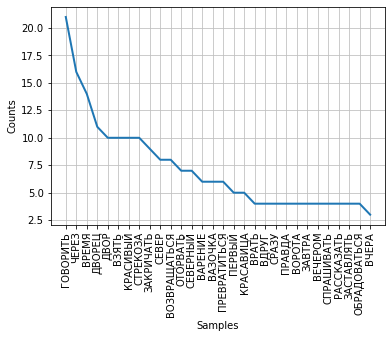

In [ ]:
fdist2.plot(30,cumulative=False)

In [ ]:
frame = pd.DataFrame(data=[fdist1]) 
frame.to_excel('frequency1.xlsx') 
frame = pd.DataFrame(data=[fdist2]) 
frame.to_excel('frequency2.xlsx') 
frame = pd.DataFrame(data=[fdist3]) 
frame.to_excel('frequency3.xlsx') 
frame = pd.DataFrame(data=[fdist4]) 
frame.to_excel('frequency4.xlsx') 
frame = pd.DataFrame(data=[fdist5]) 
frame.to_excel('frequency5.xlsx') 
frame = pd.DataFrame(data=[fdist6]) 
frame.to_excel('frequency6.xlsx') 